Aim: 
- Plot Timeseries with clear discretization = precision
- Figure with network + noise

- plot AUC vs noise for 10^-1 and 10^-5
    - full precision
    - limited precision
    - noise 
  

!!! find files in NoisyNetworkReconstruction_SDDVproof_of_concept/precisiontestsimulations


In [1]:
from os.path import abspath, sep, pardir
import sys
sys.path.append(abspath('') + sep + pardir + sep )
import MPL_style

In [2]:
def find(s, ch):
    return [i for i, ltr in enumerate(s) if ltr == ch]
pwd_p=abspath('')
idxs=find(pwd_p, sep)
path_GIT=pwd_p[:idxs[-2]] + sep

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import scipy.io as sio

# Plot AUC vs Noise

In [4]:
#data with maximal precision
#W_max = maximal precision
#W_prec = limited precision 
#W_noi = data with noise in range of precision 
W_max_1 = sio.loadmat(path_GIT+"proof_of_concept/precisiontest/simulations/"+
       "summary_2palg_precisionfull_S1e-01.mat")["all_AUCS"] #"all Aucs" prevents useless data info to be printed
W_max_2 = sio.loadmat(path_GIT+"proof_of_concept/precisiontest/simulations/"+
       "summary_2palg_precisionfull_S1e-05.mat")["all_AUCS"]
W_noi_1 = sio.loadmat(path_GIT+"proof_of_concept/precisiontest/simulations/"+
       "summary_2palg_precisionaddnoise_S1e-01.mat")["all_AUCS"]
W_noi_2 = sio.loadmat(path_GIT+"proof_of_concept/precisiontest/simulations/"+
       "summary_2palg_precisionaddnoise_S1e-05.mat")["all_AUCS"]
W_prec_1 = sio.loadmat(path_GIT+"proof_of_concept/precisiontest/simulations/"+
       "summary_2palg_precisionround_S1e-01.mat")["all_AUCS"]
W_prec_2 = sio.loadmat(path_GIT+"proof_of_concept/precisiontest/simulations/"+
       "summary_2palg_precisionround_S1e-05.mat")["all_AUCS"]

### easy plot with mean


In [5]:
Max1=np.mean(W_max_1)
Max2=np.mean(W_max_2)
Prec1=np.mean(W_prec_1)
Prec2=np.mean(W_prec_2)
Noi1=np.mean(W_noi_1)
Noi2=np.mean(W_noi_2)

In [6]:
noise=[10**-1,10**-5]

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


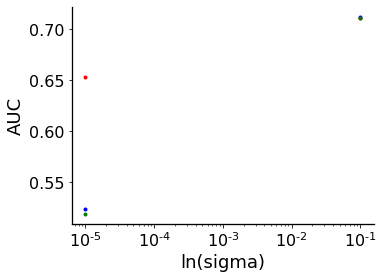

In [7]:
plt.plot(noise,[Max1,Max2],'.',color='red')
plt.plot(noise,[Prec1,Prec2],'.',color='blue')
plt.plot(noise,[Noi1,Noi2],'.',color='green')
plt.xscale('log')
plt.ylabel('AUC')
plt.xlabel('ln(sigma)')
plt.show()

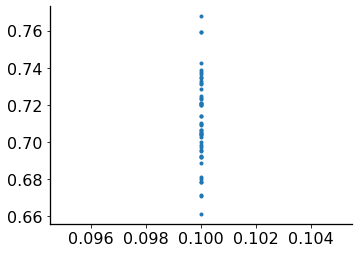

In [8]:
s=np.zeros(np.size(W_max_1))
for i in range(0,np.size(W_max_1)):
    s[i]=10**-1
plt.plot(s,W_max_1,'.')

In [9]:
import seaborn as sns


In [10]:
import pandas as pd

In [11]:
noise1=np.zeros(np.size(W_max_1)*3)
noise2=np.zeros(np.size(W_max_1)*3)
for i in range(0,np.size(W_max_1)*3):
    noise1[i]=10**-1
    noise2[i]=10**-5

In [12]:
noise1=np.zeros(np.size(W_max_1))
noise2=np.zeros(np.size(W_max_1))
for i in range(0,np.size(W_max_1)):
    noise1[i]=10**-1
    noise2[i]=10**-5

In [13]:
noise=np.concatenate([noise1,noise2,noise1,noise2,noise1,noise2])
W_max_2=np.concatenate(W_max_2)
W_max_1=np.concatenate(W_max_1)
W_prec_1=np.concatenate(W_prec_1)
W_prec_2=np.concatenate(W_prec_2)
W_noi_1=np.concatenate(W_noi_1)
W_noi_2=np.concatenate(W_noi_2)
AUC=np.concatenate([W_max_1,W_max_2,W_prec_1,W_prec_2,W_noi_1,W_noi_2])
AUC=AUC.tolist()
noise=noise.tolist() #for dic file you need a list

In [14]:
def namelist(n,name):
    return [name for i in range(n)]
name1=namelist(100,'maximal precision')
name2=namelist(100,'precision of 3 digits')
name3=namelist(100,'noise of $10^{-4}$')

name=np.concatenate([name1,name2,name3])
name=name.tolist()

In [15]:
d = {'AUC': AUC, 'noise': noise,'dataset' : name} 

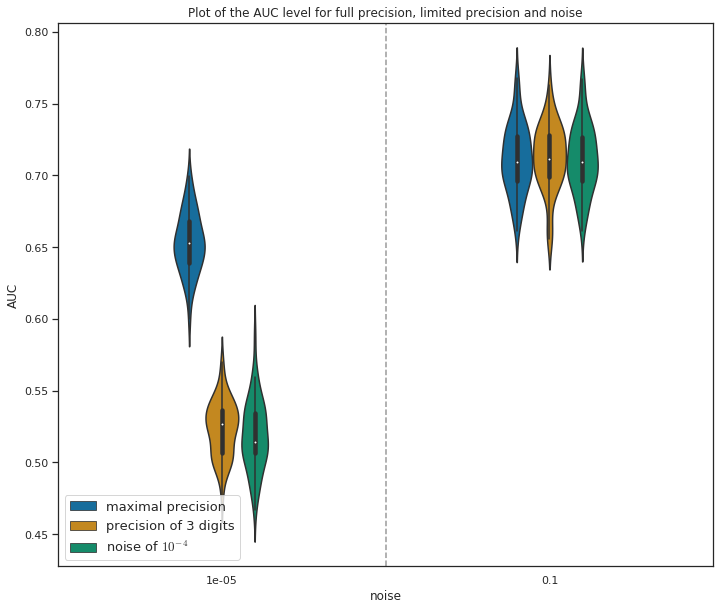

In [16]:
sns.set(style="ticks")
fig, ax = plt.subplots(figsize=(13,10))
sns.violinplot(ax=ax,x="noise", y="AUC", hue="dataset", width=0.3,dodge=True,data=d, palette="colorblind",legend_out=False)
ax.legend(loc=3,prop={'size': 13})
ax.set(xlabel='noise', ylabel='AUC')
ax.set_title('Plot of the AUC level for full precision, limited precision and noise', fontdict={'fontsize': 12, 'fontweight': 'medium'})
#the dodge False will all put them int he same bin, but then you don't see0,1
ax.axvline(x=0.5,color='black',linestyle='--',alpha=0.4)

ax.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=True) # labels along the bottom edge are off

In [17]:
fig.savefig('/home/beate/LocalGitHubNetworkKolleg/NoisyNetworkReconstruction_SDDV/plotting/Figure2/AUC_vs_PrecisionQuestion.pdf')

In [18]:
#vectorgraphic
fig.savefig('/home/beate/LocalGitHubNetworkKolleg/NoisyNetworkReconstruction_SDDV/plotting/Figure2/AUC_vs_PrecisionQuestion.svg')